In [2]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score 

In [3]:
df = pd.read_csv("./dataset/united-states-population-2020-12-19.csv")
df 

,date,Life Expectancy from Birth (Years),Annual % Change
0,1950-12-31,68.140,NaN
1,1951-12-31,68.330,0.28
2,1952-12-31,68.520,0.28
3,1953-12-31,68.710,0.28
4,1954-12-31,68.900,0.28
...,...,...,...
146,2096-12-31,88.376,0.12
147,2097-12-31,88.478,0.12
148,2098-12-31,88.580,0.12
149,2099-12-31,88.682,0.12


In [4]:
df['year'] = pd.DatetimeIndex(df['date']).year
df_filtered = df[df['year']<=2019]
df_filtered

,date,Life Expectancy from Birth (Years),Annual % Change,year
0,1950-12-31,68.140,NaN,1950
1,1951-12-31,68.330,0.28,1951
2,1952-12-31,68.520,0.28,1952
3,1953-12-31,68.710,0.28,1953
4,1954-12-31,68.900,0.28,1954
...,...,...,...,...
65,2015-12-31,78.888,-0.03,2015
66,2016-12-31,78.862,-0.03,2016
67,2017-12-31,78.836,-0.03,2017
68,2018-12-31,78.810,-0.03,2018


In [5]:
df_filtered = df_filtered.iloc[1:,0:4]
df_filtered.columns = ['date', 'LifeExpectancy', 'Annual % Change', 'year']
df_filtered['year'] = df_filtered['year'].apply(lambda x: pd.to_numeric(x, errors ='coerce')) 
df_filtered = df_filtered.drop(['date'],axis=1)
df_filtered = df_filtered.drop(['Annual % Change'],axis=1)

In [6]:
df_filtered 

,LifeExpectancy,year
1,68.330,1951
2,68.520,1952
3,68.710,1953
4,68.900,1954
5,69.090,1955
...,...,...
65,78.888,2015
66,78.862,2016
67,78.836,2017
68,78.810,2018


In [7]:
# df_filtered = df_filtered.sort_values('LifeExpectancy')
df_filtered = df_filtered.sort_values('year')
# df_filtered = df_filtered.sort_values(by=['year'])
X = df_filtered.iloc[:, 1:2].values
y = df_filtered.iloc[:, 0:1].values
 
# removing null value of  'Life expectancy ' 
# df_Country['LifeExpectancy']=df_Country['LifeExpectancy'].fillna(value=df_Country['LifeExpectancy'].mean())
df_filtered.isnull().sum()

LifeExpectancy    0
year              0
dtype: int64

In [8]:
df_filtered.isnull().sum()

LifeExpectancy    0
year              0
dtype: int64

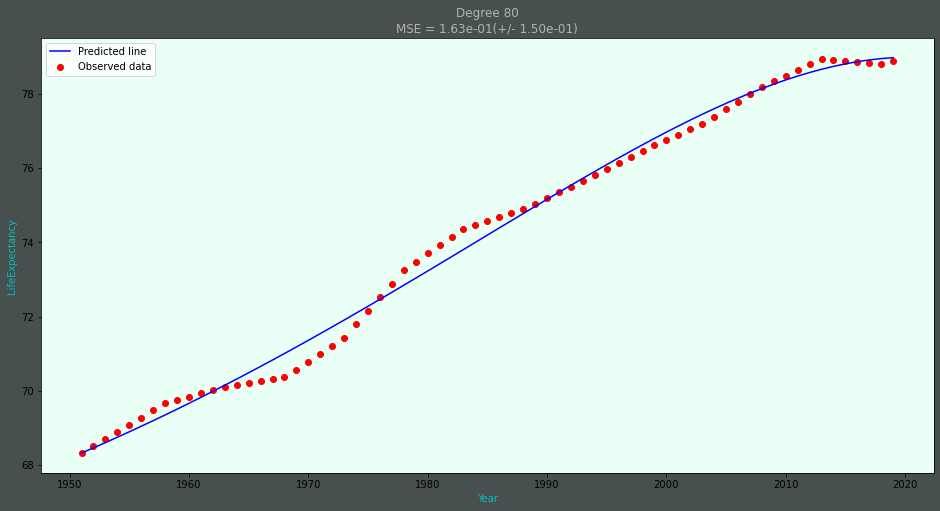

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
 
from sklearn.model_selection import cross_val_score
poly_features = PolynomialFeatures(degree=80)
# X_poly = poly_features.fit_transform(np.array(X).reshape(-1,1))
X_poly = poly_features.fit_transform(X)
 
pol_reg = LinearRegression()

pipeline = Pipeline([("polynomial_features", poly_features),
                         ("linear_regression", pol_reg)])

pol_reg.fit(X_poly, y)

scores = cross_val_score(pipeline, X, y,
                             scoring="neg_mean_squared_error", cv=10)

# Visualizing the Polymonial Regression results
fig, ax = plt.subplots(figsize=(16,8),facecolor=(.28, .31, .31))
ax.set_facecolor('#eafff5')
plt.scatter(X, y, color='red')
plt.plot(X, pol_reg.predict(poly_features.fit_transform(X)), color='blue')
plt.legend(['Predicted line', 'Observed data'])
plt.title('Polynomial-regression', color='0.7')
plt.xlabel('Year', color='c')
plt.ylabel('LifeExpectancy', color='c')
plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
        poly_features.degree, -scores.mean(), scores.std()))
plt.show()

In [24]:
predict_future = pol_reg.predict(poly_features.fit_transform([[2030]]))
predict_future 

array([[78.98245086]])

In [26]:
df[df['year']==2030]

,date,Life Expectancy from Birth (Years),Annual % Change,year
80,2030-12-31,80.282,0.28,2030
